In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [102]:
path = "Online Retail.xlsx"
df = pd.read_excel(path)

In [103]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [104]:
df = df.drop(['Description', 'InvoiceNo'], axis=1)

Kita drop saja Description dan InvoiceNo, karena fitur tersebut merupakan identifier unik yang tidak diperlukan.

In [106]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [107]:
country_counts = df['Country'].value_counts()
country_mapping = {}

for i, (country, count) in enumerate(country_counts.items()):
    country_mapping[country] = i + 1

df['Country_Encoded'] = df['Country'].map(country_mapping)

print("Country Encoding Mapping (based on frequency):")
for country, code in sorted(country_mapping.items(), key=lambda x: x[1]):
    print(f"{code}: {country}")

df[['Country', 'Country_Encoded']].head(10)


Country Encoding Mapping (based on frequency):
1: United Kingdom
2: Germany
3: France
4: EIRE
5: Spain
6: Netherlands
7: Belgium
8: Switzerland
9: Portugal
10: Australia
11: Norway
12: Italy
13: Channel Islands
14: Finland
15: Cyprus
16: Sweden
17: Unspecified
18: Austria
19: Denmark
20: Japan
21: Poland
22: Israel
23: USA
24: Hong Kong
25: Singapore
26: Iceland
27: Canada
28: Greece
29: Malta
30: United Arab Emirates
31: European Community
32: RSA
33: Lebanon
34: Lithuania
35: Brazil
36: Czech Republic
37: Bahrain
38: Saudi Arabia


,Country,Country_Encoded
0,United Kingdom,1
1,United Kingdom,1
2,United Kingdom,1
3,United Kingdom,1
4,United Kingdom,1
5,United Kingdom,1
6,United Kingdom,1
7,United Kingdom,1
8,United Kingdom,1
9,United Kingdom,1


Kita akan encoding Country berdasarkan jumlah data yang muncul. Data yang paling banyak muncul dijadikan 1, yang paling banyak selanjutnya dijadikan 2, dst.

In [108]:
# Extract date components from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

print("DataFrame with extracted date components:")
print(df[['StockCode', 'Quantity', 'InvoiceDate', 'Year', 'Month', 'Day', 'Hour', 'UnitPrice', 'CustomerID', 'Country']].head())

df = df.drop('InvoiceDate', axis=1)


DataFrame with extracted date components:
  StockCode  Quantity         InvoiceDate  Year  Month  Day  Hour  UnitPrice  \
0    85123A         6 2010-12-01 08:26:00  2010     12    1     8       2.55   
1     71053         6 2010-12-01 08:26:00  2010     12    1     8       3.39   
2    84406B         8 2010-12-01 08:26:00  2010     12    1     8       2.75   
3    84029G         6 2010-12-01 08:26:00  2010     12    1     8       3.39   
4    84029E         6 2010-12-01 08:26:00  2010     12    1     8       3.39   

   CustomerID         Country  
0     17850.0  United Kingdom  
1     17850.0  United Kingdom  
2     17850.0  United Kingdom  
3     17850.0  United Kingdom  
4     17850.0  United Kingdom  


Kita mengekstrak data Year, Month, Day, dan Hour untuk dijadikan fitur masing-masing, karena mungkin dapat berguna dalam clustering serta analisis nanti.

In [109]:
df = df.drop(['Country', 'StockCode', 'CustomerID'], axis=1)

Lupa sebelumnya untuk drop StockCode dan CustomerID (fitur-fitur tersebut banyak nilai unik dan tidak ada ordinalitas pada nilainya), sekalian didrop dengan Country karena sudah ada fitur encoded nya.

In [111]:
import numpy as np
np.random.seed(42)

# Take a random sample of 5000 rows (about 1% of the data)
sample_df = df.sample(n=5000, random_state=42)

print(f"Original dataset shape: {df.shape}")
print(f"Sampled dataset shape: {sample_df.shape}")

sample_df.head()


Original dataset shape: (541909, 7)
Sampled dataset shape: (5000, 7)


,Quantity,UnitPrice,Country_Encoded,Year,Month,Day,Hour
209268,24,0.85,1,2011,6,1,12
207108,4,6.95,1,2011,5,27,17
167085,4,0.65,1,2011,4,21,17
471836,3,1.95,1,2011,11,16,10
115865,2,9.95,1,2011,3,10,8


Karena dataset sangat besar (500 ribu baris data), maka kita akan mengambil sampel saja sebanyak 5000 secara acak.

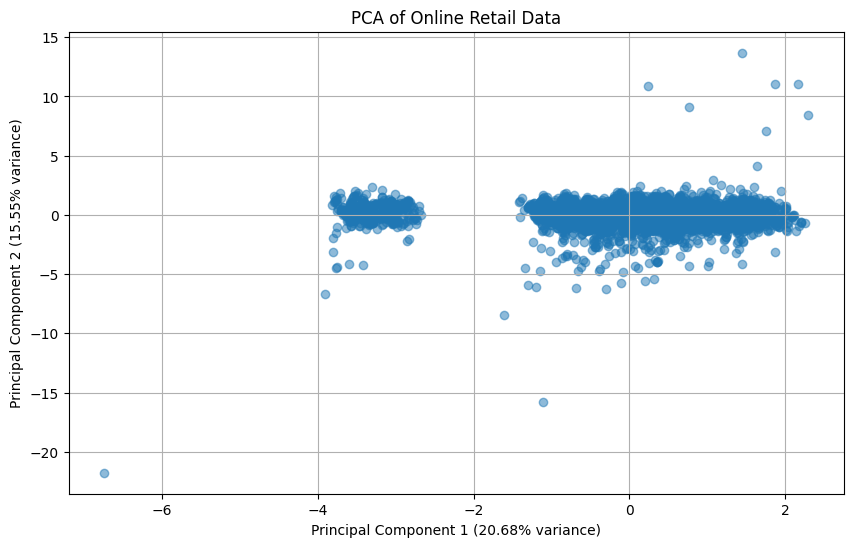

Explained variance ratio: [0.20683207 0.15545764]
Total variance explained: 36.23%

Principal Component 1 feature importance:
Year: 0.663
Month: -0.641
Day: 0.371

Principal Component 2 feature importance:
Hour: 0.606
Quantity: -0.478
Country_Encoded: -0.477


In [113]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_sample = scaler.fit_transform(sample_df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_sample)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA of Online Retail Data')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True)
plt.show()


Sekilas jika dilihat, 2 cluster adalah jumlah yang optimal. Akan dicoba metode-metode pencarian K terlebih dahulu.

### Kita akan menggunakan beberapa cara untuk menentukan cluster
Pertama adalah elbow/knee method (metode siku)

Elbow method adalah teknik untuk menentukan jumlah cluster (k) yang optimal dalam algoritma clustering seperti K-Means. 
Metode ini bekerja dengan menghitung nilai inertia (jumlah kuadrat jarak dari setiap titik data ke centroid cluster terdekatnya) 
untuk berbagai nilai k.

Formula inertia dalam K-Means:
Inertia = Σ min(||x_i - μ_j||²)

Dimana:
- x_i adalah titik data
- μ_j adalah centroid cluster
- ||x_i - μ_j||² adalah jarak Euclidean kuadrat antara titik data dan centroid

Pada grafik inertia vs jumlah cluster, kita mencari "siku" atau titik di mana penambahan cluster tidak lagi 
memberikan pengurangan inertia yang signifikan. Titik ini menandakan jumlah cluster optimal.

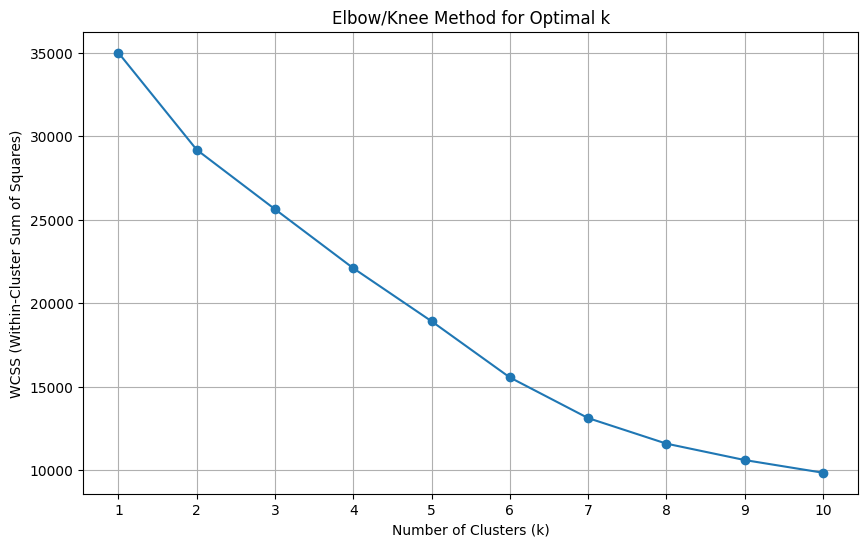

Rate of change in WCSS:
From 1 to 2 clusters: 16.59%
From 2 to 3 clusters: 12.19%
From 3 to 4 clusters: 13.77%
From 4 to 5 clusters: 14.37%
From 5 to 6 clusters: 17.77%
From 6 to 7 clusters: 15.63%
From 7 to 8 clusters: 11.65%
From 8 to 9 clusters: 8.47%
From 9 to 10 clusters: 7.15%


In [114]:
# Elbow/Knee Method for determining optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(sample_df)

wcss = []
k_range = range(1, 11)  # Try 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow/Knee Method for Optimal k')
plt.grid(True)
plt.xticks(k_range)
plt.show()


Pada Elbow method belum terlihat K berapa yang optimal, karena garisnya cukup linear, tidak ada penurunan atau kenaikan drastis.

# Metode Silhouette Score

Silhouette Score adalah metrik untuk mengukur seberapa baik setiap objek dikelompokkan dalam cluster-nya dibandingkan dengan cluster lainnya. Nilai Silhouette Score berkisar antara -1 hingga 1:

- Nilai mendekati 1: objek dikelompokkan dengan tepat dalam cluster yang sesuai
- Nilai mendekati 0: objek berada di perbatasan antara dua cluster
- Nilai mendekati -1: objek mungkin ditempatkan di cluster yang salah

Silhouette Score dihitung dengan formula:

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Dimana:
- $a(i)$ adalah rata-rata jarak antara objek $i$ dengan semua objek lain dalam cluster yang sama
- $b(i)$ adalah rata-rata jarak minimum antara objek $i$ dengan objek-objek di cluster lain

Silhouette Score yang tinggi menunjukkan bahwa cluster memiliki kohesi yang baik (objek dalam cluster yang sama berdekatan) dan separasi yang baik (cluster berbeda terpisah dengan jelas).


For n_clusters = 2, the silhouette score is 0.4619
For n_clusters = 3, the silhouette score is 0.2330
For n_clusters = 4, the silhouette score is 0.2476
For n_clusters = 5, the silhouette score is 0.2378
For n_clusters = 6, the silhouette score is 0.2543
For n_clusters = 7, the silhouette score is 0.2618
For n_clusters = 8, the silhouette score is 0.2614
For n_clusters = 9, the silhouette score is 0.2648
For n_clusters = 10, the silhouette score is 0.2623


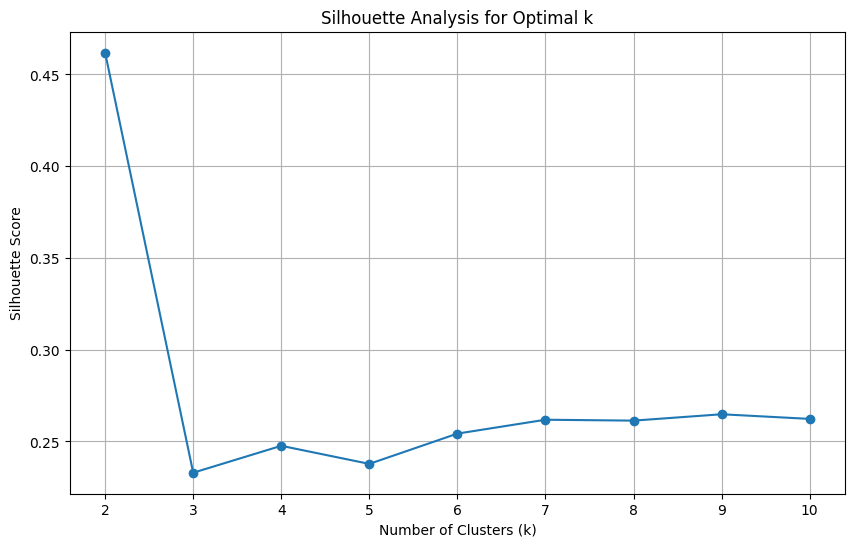


Optimal number of clusters based on silhouette score: 2


In [115]:
# Silhouette Analysis for determining optimal number of clusters
from sklearn.metrics import silhouette_score
import numpy as np

# Calculate silhouette scores for different values of k
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.xticks(k_range)
plt.show()

optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on silhouette score: {optimal_k}")


Berdasarkan Silhouette score, K = 2 adalah jumlah cluster yang optimal, sesuai dengan yang ada di visualisasi PCA.

Calinski-Harabasz Index

adalah metrik evaluasi cluster yang mengukur rasio antara varians antar-cluster dan varians intra-cluster.

Nilai yang lebih tinggi menunjukkan cluster yang lebih terpisah dengan baik dan lebih padat.

Calinski-Harabasz Index dihitung dengan formula:

$$CH = \frac{SS_B}{SS_W} \times \frac{N-k}{k-1}$$

Dimana:
- $SS_B$ adalah jumlah kuadrat antar-cluster (between-cluster sum of squares)
- $SS_W$ adalah jumlah kuadrat intra-cluster (within-cluster sum of squares)
- $N$ adalah jumlah total data points
- $k$ adalah jumlah cluster

Semakin tinggi nilai indeks ini, semakin baik kualitas clustering yang dihasilkan.


For n_clusters = 2, the Calinski-Harabasz Index is 994.13
For n_clusters = 3, the Calinski-Harabasz Index is 912.95
For n_clusters = 4, the Calinski-Harabasz Index is 971.62
For n_clusters = 5, the Calinski-Harabasz Index is 1060.40
For n_clusters = 6, the Calinski-Harabasz Index is 1247.39
For n_clusters = 7, the Calinski-Harabasz Index is 1386.08
For n_clusters = 8, the Calinski-Harabasz Index is 1438.56
For n_clusters = 9, the Calinski-Harabasz Index is 1432.62
For n_clusters = 10, the Calinski-Harabasz Index is 1413.96


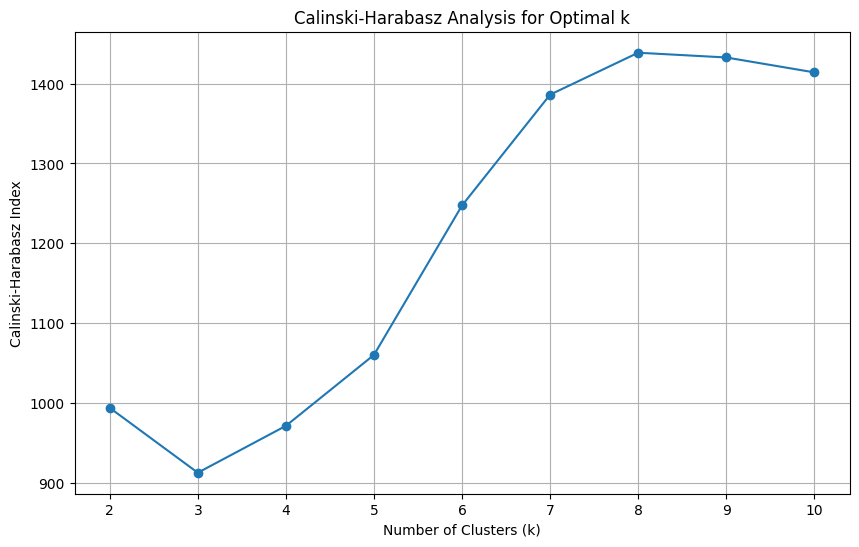


Optimal number of clusters based on Calinski-Harabasz Index: 8


In [116]:
from sklearn.metrics import calinski_harabasz_score

ch_scores = []
k_range = range(2, 11)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    ch_score = calinski_harabasz_score(scaled_data, cluster_labels)
    ch_scores.append(ch_score)
    print(f"For n_clusters = {k}, the Calinski-Harabasz Index is {ch_score:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, ch_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Analysis for Optimal k')
plt.grid(True)
plt.xticks(k_range)
plt.show()

optimal_k_ch = k_range[np.argmax(ch_scores)]
print(f"\nOptimal number of clusters based on Calinski-Harabasz Index: {optimal_k_ch}")


Hasil K optimal pada Calinski-Harabasz berbeda dengan Elbow dan Silhouette score.

Setiap metode pencarian K optimal berbeda, maka akan dicoba yang sesuai dengan visualisasi PCA sebelumnya terlebih dahulu, yaitu 2 cluster.

# K-Means Clustering

K-Means Clustering adalah algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam K cluster berdasarkan kemiripan karakteristiknya. Algoritma ini bekerja dengan cara:

1. Menentukan jumlah cluster K yang diinginkan
2. Memilih K titik secara acak sebagai centroid awal
3. Mengelompokkan setiap data ke centroid terdekat
4. Menghitung ulang posisi centroid berdasarkan rata-rata data dalam cluster
5. Mengulangi langkah 3-4 hingga centroid tidak berubah signifikan

## Formula K-Means

K-Means berusaha meminimalkan Sum of Squared Distances (SSD) antara data dan centroid terdekatnya:

$$J = \sum_{i=1}^{n} \sum_{j=1}^{k} w_{ij} ||x_i - \mu_j||^2$$

Dimana:
- $J$ adalah fungsi objektif yang ingin diminimalkan
- $x_i$ adalah data point ke-i
- $\mu_j$ adalah centroid cluster ke-j
- $w_{ij}$ adalah 1 jika data $x_i$ termasuk cluster j, dan 0 jika tidak
- $||x_i - \mu_j||^2$ adalah jarak Euclidean kuadrat antara data dan centroid

Algoritma ini sederhana dan efisien, namun hasilnya dapat dipengaruhi oleh inisialisasi centroid awal dan jumlah cluster K yang ditentukan.


Cluster Centers:
                0         1         2         3         4         5         6
Cluster                                                                      
0       -0.008516 -0.001089 -0.000561  0.292070 -0.107904  0.044621 -0.007386
1        0.099834  0.012769  0.006577 -3.423835  1.264918 -0.523077  0.086587

Cluster Sizes:
Cluster
0    4607
1     393
Name: count, dtype: int64


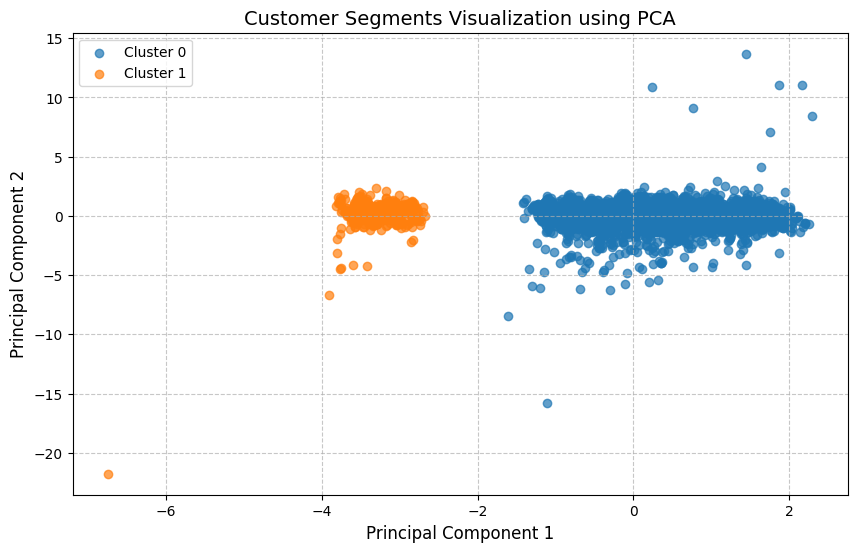

In [117]:
# Applying K-means clustering with the optimal number of clusters
optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataframe
df_retail_features = pd.DataFrame(scaled_data)
df_retail_features['Cluster'] = cluster_labels

# Analyze cluster characteristics
cluster_analysis = df_retail_features.groupby('Cluster').mean()
print("Cluster Centers:")
print(cluster_analysis)

# Count number of data points in each cluster
cluster_sizes = df_retail_features['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)

from sklearn.decomposition import PCA

# Reduce data to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(X_pca[cluster_labels == cluster, 0],
                X_pca[cluster_labels == cluster, 1],
                label=f'Cluster {cluster}',
                alpha=0.7)

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('Customer Segments Visualization using PCA', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Hasil K-Means clustering cukup baik, memisahkan persebaran data dengan jelas dan sesuai dengan analisis sekilas pada visualisasi sebelum clustering.

# Hierarchical Clustering dan Dendrogram

Hierarchical Clustering adalah teknik clustering yang membangun hierarki cluster dengan pendekatan "bottom-up" (agglomerative) atau "top-down" (divisive). Dalam analisis ini, kita menggunakan metode agglomerative yang bekerja dengan langkah-langkah berikut:

1. Mulai dengan menganggap setiap data point sebagai cluster individual
2. Secara iteratif menggabungkan dua cluster terdekat hingga semua data point berada dalam satu cluster
3. Hasil akhirnya adalah struktur hierarki yang dapat divisualisasikan sebagai dendrogram

Dendrogram adalah representasi visual berbentuk diagram pohon yang menunjukkan urutan penggabungan cluster dan jarak antar cluster. Sumbu vertikal menunjukkan jarak atau dissimilarity antar cluster, sedangkan sumbu horizontal menunjukkan data points atau cluster.

Formula dasar untuk menghitung jarak antar cluster menggunakan metode Ward:

$$d(u,v) = \sqrt{\frac{|v| \times |s|}{|v|+|s|}} \times ||v-s||_2$$

Dimana:
- $u$ adalah cluster baru hasil penggabungan cluster $v$ dan $s$
- $|v|$ dan $|s|$ adalah ukuran cluster
- $||v-s||_2$ adalah jarak Euclidean antara centroid cluster

Keuntungan Hierarchical Clustering:
- Tidak perlu menentukan jumlah cluster di awal
- Memberikan visualisasi hierarki yang membantu memahami struktur data
- Memungkinkan pemilihan jumlah cluster yang optimal berdasarkan dendrogram



Performing Hierarchical Clustering:


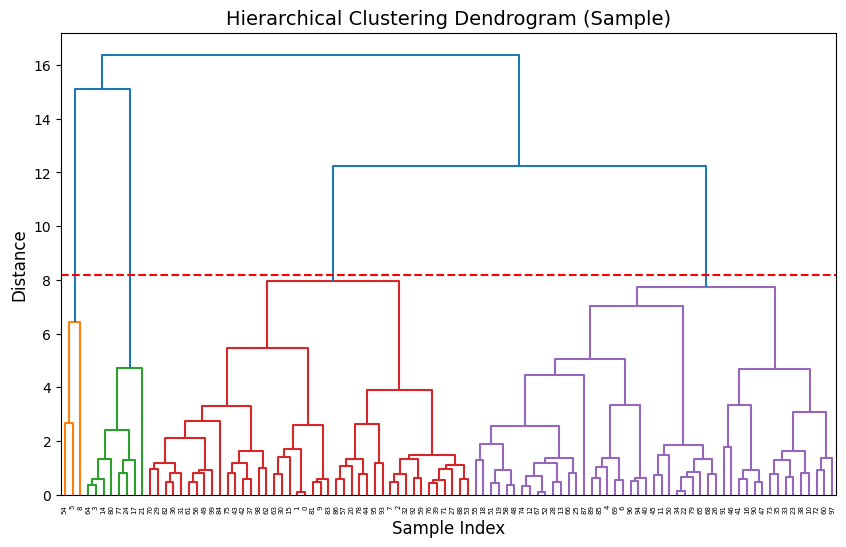


Hierarchical Cluster Centers:
                             0         1         2         3         4  \
Hierarchical_Cluster                                                     
0                    -0.013722 -0.001361  0.009685  0.287236 -0.105925   
1                     0.163106  0.016182 -0.115121 -3.414258  1.259092   

                             5         6   Cluster  
Hierarchical_Cluster                                
0                     0.043469 -0.007506  0.001301  
1                    -0.516697  0.089217  0.997423  

Hierarchical Cluster Sizes:
Hierarchical_Cluster
0    4612
1     388
Name: count, dtype: int64


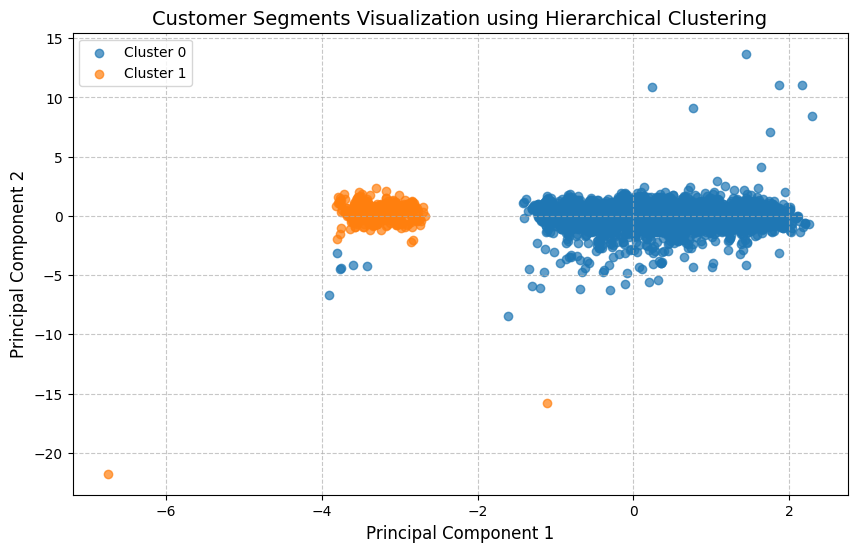


Clustering Comparison (K-means vs Hierarchical):
Hierarchical     0    1
K-means                
0             4606    1
1                6  387


In [118]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import numpy as np

print("\nPerforming Hierarchical Clustering:")

n_clusters = optimal_k
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

df_retail_features['Hierarchical_Cluster'] = hierarchical_cluster.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))

# Taking a sample of data for dendrogram visualization (full dataset may be too large)
sample_size = min(100, scaled_data.shape[0])
indices = np.random.choice(range(scaled_data.shape[0]), sample_size, replace=False)
sample_data = scaled_data[indices]

# Create linkage matrix and dendrogram
linked = linkage(sample_data, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Sample)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=np.max(linked[:, 2])/2, color='r', linestyle='--')
plt.show()

# Analyze hierarchical cluster characteristics
hierarchical_cluster_analysis = df_retail_features.groupby('Hierarchical_Cluster').mean()
print("\nHierarchical Cluster Centers:")
print(hierarchical_cluster_analysis)

# Count number of data points in each hierarchical cluster
hierarchical_cluster_sizes = df_retail_features['Hierarchical_Cluster'].value_counts().sort_index()
print("\nHierarchical Cluster Sizes:")
print(hierarchical_cluster_sizes)

plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(X_pca[df_retail_features['Hierarchical_Cluster'] == cluster, 0],
                X_pca[df_retail_features['Hierarchical_Cluster'] == cluster, 1],
                label=f'Cluster {cluster}',
                alpha=0.7)

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('Customer Segments Visualization using Hierarchical Clustering', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

comparison = pd.crosstab(df_retail_features['Cluster'], 
                         df_retail_features['Hierarchical_Cluster'],
                         rownames=['K-means'],
                         colnames=['Hierarchical'])
print("\nClustering Comparison (K-means vs Hierarchical):")
print(comparison)


Hasil Hierarchal Clustering tidak sebagus hasil dari K-Means, namun hasilnya mirip. Meskipun berdasarkan Silhouette score jumlah cluster yang optimal adalah 2, tetapi dendrogram tidak menunjukkan hal tersebut.

# Kesimpulan

Metode penentuan K:
- Elbow method tidak cukup jelas mana yang bagus K nya, karena garisnya linear dan tidak ada perubahan drastis
- Silhouette score K = 2, 2 cluster sama dengan dugaan awal ketika visualisasi.
- Calinski-Harabasz Index menunjukkan terlalu banyak jumlah cluster padahal berdasarkan visualisasi tidak sebanyak itu.

Performa clustering:
- K-means memisahkan data dengan baik, dan jelas cluster yang terpisah
- Hierarchal clustering memisahkan data juga sedikit baik, ada beberapa cluster 0 yang dekat dengan cluster 1 padahal jaraknya seharusnya sudah jauh.

Berdasarkan analisis clustering yang telah dilakukan, dapat disimpulkan:

## Karakteristik Cluster
- **Cluster 0 (4607 data)**: 
  - Quantity: Sedikit di bawah rata-rata (-0.008516)
  - UnitPrice: Sedikit di bawah rata-rata (-0.001089)
  - Year: Di atas rata-rata (0.292070) - cenderung berbelanja di tahun yang lebih baru
  - Month: Di bawah rata-rata (-0.107904) - cenderung berbelanja di awal tahun
  - Day: Di atas rata-rata (0.044621) - cenderung berbelanja di akhir bulan
  - Hour: Sedikit di bawah rata-rata (-0.007386)
  - Merupakan kelompok pelanggan mayoritas (92% dari total)

- **Cluster 1 (393 data)**:
  - Quantity: Di atas rata-rata (0.099834) - membeli dalam jumlah lebih banyak
  - UnitPrice: Di atas rata-rata (0.012769) - membeli produk yang lebih mahal
  - Year: Jauh di bawah rata-rata (-3.423835) - cenderung berbelanja di tahun yang lebih lama
  - Month: Jauh di atas rata-rata (1.264918) - cenderung berbelanja di akhir tahun
  - Day: Di bawah rata-rata (-0.523077) - cenderung berbelanja di awal bulan
  - Hour: Di atas rata-rata (0.086587) - cenderung berbelanja di jam yang lebih siang
  - Merupakan kelompok pelanggan minoritas (8% dari total)